# Project: Anaylsis of factors leading to No Show Appointments
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# Introduction 
In this project we will answer the following questions:
### Which factors if any are important in order to predict if a patient will show up for their scheduled appointment?

# Data Wrangling

In [39]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [40]:
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head(1)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Check for missing values.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are no missing values in the data.

Check for duplicated values.

In [42]:
df.duplicated().sum()

0

There are 0 duplicated cell in the data.

Rename columns to fallow python naming conventions.

In [43]:
df = df.rename(mapper=lambda x: x.strip().replace('-', '_').lower(), axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   patientid       110527 non-null  float64
 1   appointmentid   110527 non-null  int64  
 2   gender          110527 non-null  object 
 3   scheduledday    110527 non-null  object 
 4   appointmentday  110527 non-null  object 
 5   age             110527 non-null  int64  
 6   neighbourhood   110527 non-null  object 
 7   scholarship     110527 non-null  int64  
 8   hipertension    110527 non-null  int64  
 9   diabetes        110527 non-null  int64  
 10  alcoholism      110527 non-null  int64  
 11  handcap         110527 non-null  int64  
 12  sms_received    110527 non-null  int64  
 13  no_show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


change the data types and drop the columns will not be used in the analysis.

Fix the data type needed for analysis and drop the columns not needed for analysis.

In [44]:
df["scheduledday"] = pd.to_datetime(df["scheduledday"])
df["appointmentday"] = pd.to_datetime(df["appointmentday"])
df.drop(["patientid", "neighbourhood", "appointmentid"],axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   gender          110527 non-null  object             
 1   scheduledday    110527 non-null  datetime64[ns, UTC]
 2   appointmentday  110527 non-null  datetime64[ns, UTC]
 3   age             110527 non-null  int64              
 4   scholarship     110527 non-null  int64              
 5   hipertension    110527 non-null  int64              
 6   diabetes        110527 non-null  int64              
 7   alcoholism      110527 non-null  int64              
 8   handcap         110527 non-null  int64              
 9   sms_received    110527 non-null  int64              
 10  no_show         110527 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(2)
memory usage: 9.3+ MB


In [45]:
df.head(1)

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,No


Get rid of the hour at which they made an appoinment since only the day will be used in the analysis.

In [46]:
df['scheduledday'] = pd.to_datetime(df['scheduledday']).dt.floor('d')

In [47]:
df.head(1)

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,No


Create a new coloumn for the number of days between the day the patiant schedeled an appoinment and the day of the appoinment.

In [48]:
df["days_btn_sch_app"] = df["appointmentday"] - df["scheduledday"]
df.head(1)

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,days_btn_sch_app
0,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,No,0 days


In [49]:
df["days_btn_sch_app"] = df["days_btn_sch_app"].astype(str)
df["days_btn_sch_app"] = df["days_btn_sch_app"].str.strip('days').astype(int)

In [50]:
df.head(1)

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,days_btn_sch_app
0,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,No,0


# Exploratory Data Analysis

Get only the patiant who didn't show up to their appoinment.

In [51]:
not_shown = df.query('no_show in "Yes"')
not_shown.shape

(22319, 12)

In [52]:
prop = 22319 / 110527
prop

0.20193255946510807

In [53]:
no_show = df.groupby("no_show").count()
no_show

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,days_btn_sch_app
no_show,,,,,,,,,,,
No,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208,88208
Yes,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319,22319


## 20% of patient didn't show up for their scheduled appointment

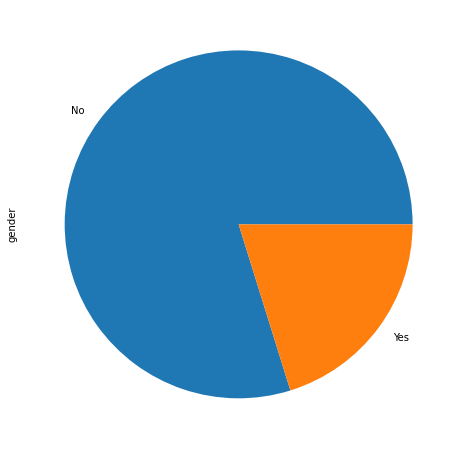

In [54]:
no_show["gender"].plot(kind = "pie", figsize = (8, 8));

### 1. Analysis of the relation between Gender and no-show an appoinment

In [55]:
#Calculate the percentage of male and female in the data.
#Calaculate the percentage of male and female patients who show or didn't show up for their scheduled appointment.
#Visualize the finding.

Get the number of female and male patiants.

In [56]:
female = (df["gender"] == "F").sum()
male = (df["gender"] == "M").sum()
(female, male)

(71840, 38687)

Get the percentage of male to female in the data.

In [57]:
df["gender"].count()

110527

In [58]:
par_f = 71840 / 110527
par_m = 38687 / 110527
(par_f, par_m )

(0.6499769287142508, 0.35002307128574917)

In [59]:
f_m = df.groupby('gender').count()
f_m

,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,days_btn_sch_app
gender,,,,,,,,,,,
F,71840,71840,71840,71840,71840,71840,71840,71840,71840,71840,71840
M,38687,38687,38687,38687,38687,38687,38687,38687,38687,38687,38687


#### More then 64% of patients are female.

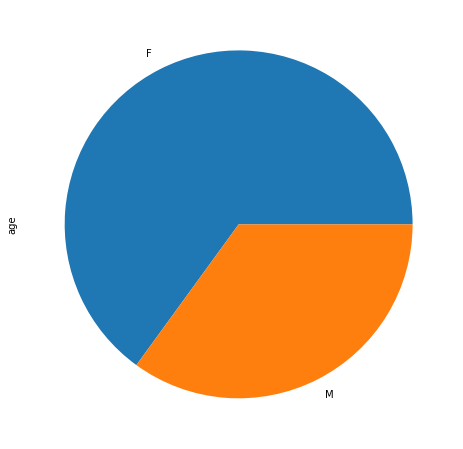

In [60]:
f_m["age"].plot(kind = "pie", figsize = (8, 8));

In [61]:
not_shown_g = df.groupby(['no_show', 'gender']).count()
not_shown_g

scheduledday  appointmentday    age  scholarship  \
no_show gender                                                     
No      F              57246           57246  57246        57246   
        M              30962           30962  30962        30962   
Yes     F              14594           14594  14594        14594   
        M               7725            7725   7725         7725   

                hipertension  diabetes  alcoholism  handcap  sms_received  \
no_show gender                                                              
No      F              57246     57246       57246    57246         57246   
        M              30962     30962       30962    30962         30962   
Yes     F              14594     14594       14594    14594         14594   
        M               7725      7725        7725     7725          7725   

                days_btn_sch_app  
no_show gender                    
No      F                  57246  
        M                  30962  
Yes     F                  14594  
        M                   7725

In [62]:
prop_f = 14594 / female
prop_m = 7725 / male
prop_f.round(3), prop_m.round(3)

(0.203, 0.2)

The percantage of male and female patiants who didn't show up for there appoinment are almost the same. 
### Gender doesn't appear to be a factor in whether a patient show up or not.

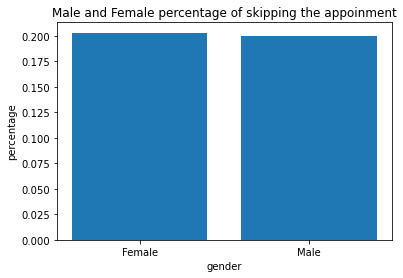

In [63]:
plt.bar(["Female", "Male"], [prop_f, prop_m])
plt.title("Male and Female percentage of skipping the appoinment")
plt.xlabel("gender")
plt.ylabel("percentage");

### 2. Analysis of the relation between the number of days since patiant schedeled an appoinment and the day of the appoinment and no-show an appoinment

In [64]:
#Calculate the average number of days for patients who show up and those who didn't show up for their appointments.
#Calculate the average number of days between schedeling an appointment and the day of the appointment. 
#Calculate number of patients with number of days below and above the average. 
#Calculate the percentage of patients who show or didn't show up for their scheduled appointment.
#Visualize the finding.

In [65]:
df["days_btn_sch_app"].describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: days_btn_sch_app, dtype: float64

In [66]:
df.query("days_btn_sch_app == -6")

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,days_btn_sch_app
71533,F,2016-05-11 00:00:00+00:00,2016-05-05 00:00:00+00:00,81,0,0,0,0,0,0,Yes,-6


The negative value in number of days since patiant schedeled an appoinment and the day of the appoinment appear to be the result of error while entering the data and confusion between the schedule day and the appointment day.

In [67]:
df["days_btn_sch_app"] = df["days_btn_sch_app"].astype(str)
df["days_btn_sch_app"] = df["days_btn_sch_app"].replace({'-':''},regex=True).astype(int)

In [68]:
df["days_btn_sch_app"].describe()

count    110527.000000
mean         10.183883
std          15.254875
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: days_btn_sch_app, dtype: float64

In [69]:
not_shown_no = df.groupby('no_show').mean()
not_shown_no

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,days_btn_sch_app
no_show,,,,,,,,
No,37.790064,0.093903,0.204392,0.073837,0.030417,0.022742,0.291334,8.754659
Yes,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371,15.832385


In [70]:
not_shown_d = not_shown_no["days_btn_sch_app"]
not_shown_d

no_show
No      8.754659
Yes    15.832385
Name: days_btn_sch_app, dtype: float64

### The average number of days between scheduling an appoinment and the day of the appoinment  is higher in patient how didn't show to their appoinment

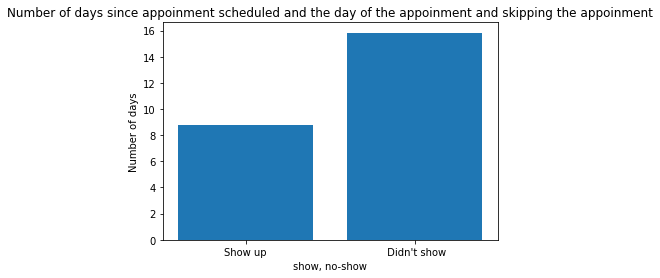

In [71]:
plt.bar(["Show up", " Didn't show"], not_shown_d)
plt.title("Number of days since appoinment scheduled and the day of the appoinment and skipping the appoinment")
plt.xlabel("show, no-show")
plt.ylabel("Number of days");

In [72]:
df["days_btn_sch_app"].mean()

10.183882671202511

##### The average number of days between the day of the appointment and the day of schedule is around 10 days.

In [73]:
more_than_average = df.query("days_btn_sch_app > 10.183883")
more_than_average.head(1)

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,days_btn_sch_app
49,F,2016-03-31 00:00:00+00:00,2016-04-29 00:00:00+00:00,27,0,0,0,0,0,1,Yes,29


In [74]:
more_than_average["days_btn_sch_app"].count()

34446

In [75]:
more_than_average_skip = more_than_average.groupby("no_show").count()
more_than_average_skip

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,days_btn_sch_app
no_show,,,,,,,,,,,
No,23246,23246,23246,23246,23246,23246,23246,23246,23246,23246,23246
Yes,11200,11200,11200,11200,11200,11200,11200,11200,11200,11200,11200


In [76]:
prop_show_above = 23246 / 34446
prop_skip_above = 11200 / 34446
(prop_show_above, prop_skip_above)

(0.674853393717703, 0.3251466062822969)

In [77]:
less_than_average = df.query("days_btn_sch_app < 10.183883")
less_than_average.head(1)

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,days_btn_sch_app
0,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,No,0


In [78]:
less_than_average["days_btn_sch_app"].count()

76081

In [79]:
less_than_average_skip = less_than_average.groupby("no_show").count()
less_than_average_skip

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,days_btn_sch_app
no_show,,,,,,,,,,,
No,64962,64962,64962,64962,64962,64962,64962,64962,64962,64962,64962
Yes,11119,11119,11119,11119,11119,11119,11119,11119,11119,11119,11119


In [80]:
prop_show_below = 64962 / 76081
prop_skip_below = 11119 / 76081
(prop_show_below, prop_skip_below)

(0.8538531302164798, 0.1461468697835202)

### The percentage of patients who didn't show up for their appointment is significantly higher when the number of days between the day of the appointment and the day of schedule is above the average of 10 days.

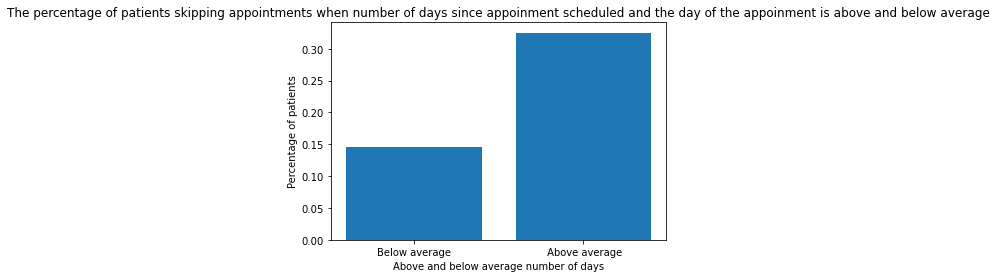

In [81]:
plt.bar(["Below average", " Above average"], [prop_skip_below, prop_skip_above])
plt.title("The percentage of patients skipping appointments when number of days since appoinment scheduled and the day of the appoinment is above and below average")
plt.xlabel("Above and below average number of days")
plt.ylabel("Percentage of patients");

### 3. Analysis of the relation between the patiant  age and whether or not they no-show an appoinment

In [82]:
#Calculate the average age for patients who didn't show up for thier appointments.
#Calculate the number of patients whose age is less below and above the average. 
#Calaculate the percentage patients who show or didn't show up for their scheduled appointment.  
#Visualize the finding.

In [83]:
not_shown_no

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,days_btn_sch_app
no_show,,,,,,,,
No,37.790064,0.093903,0.204392,0.073837,0.030417,0.022742,0.291334,8.754659
Yes,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371,15.832385


##### The average age of patients who didn't show for thier appointment is 34.3 years of age.

In [84]:
less_than_average_age = df.query("age < 34")
less_than_average_age.head(1)

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,days_btn_sch_app
3,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,0,0,0,0,0,0,No,0


In [85]:
less_than_average_age["age"].count()

50100

In [86]:
less_than_average_age_skip = less_than_average_age.groupby("no_show").count()
less_than_average_age_skip

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,days_btn_sch_app
no_show,,,,,,,,,,,
No,38611,38611,38611,38611,38611,38611,38611,38611,38611,38611,38611
Yes,11489,11489,11489,11489,11489,11489,11489,11489,11489,11489,11489


In [87]:
prop_age_below_show = 38611 / 50100
prop_age_below_skip = 11489 / 50100
(prop_age_below_show, prop_age_below_skip)

(0.7706786427145709, 0.22932135728542913)

In [88]:
more_than_average_age = df.query("age > 34")
more_than_average_age.head(1)

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,days_btn_sch_app
0,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,0,1,0,0,0,0,No,0


In [89]:
more_than_average_age["age"].count()

58901

In [90]:
more_than_average_age_skip = more_than_average_age.groupby("no_show").count()
more_than_average_age_skip

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,days_btn_sch_app
no_show,,,,,,,,,,,
No,48393,48393,48393,48393,48393,48393,48393,48393,48393,48393,48393
Yes,10508,10508,10508,10508,10508,10508,10508,10508,10508,10508,10508


In [91]:
prop_age_above_show = 48393 / 58901
prop_age_above_skip = 10508 / 58901
(prop_age_above_show, prop_age_above_skip)

(0.8215989541773484, 0.17840104582265157)

In [92]:
the_average_age = df.query("age == 34")
the_average_age.head(1)

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,days_btn_sch_app
109,F,2016-04-12 00:00:00+00:00,2016-04-29 00:00:00+00:00,34,0,0,0,0,0,1,No,17


In [93]:
the_average_age["age"].count()

1526

In [94]:
the_average_age_skip = the_average_age.groupby("no_show").count()
the_average_age_skip

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,days_btn_sch_app
no_show,,,,,,,,,,,
No,1204,1204,1204,1204,1204,1204,1204,1204,1204,1204,1204
Yes,322,322,322,322,322,322,322,322,322,322,322


In [95]:
prop_age_show = 1204 / 1526
prop_age_skip = 322 / 1526
(prop_age_show , prop_age_skip)

(0.7889908256880734, 0.21100917431192662)

### The percentage of patients skipping an appointment decrease as patients age increase

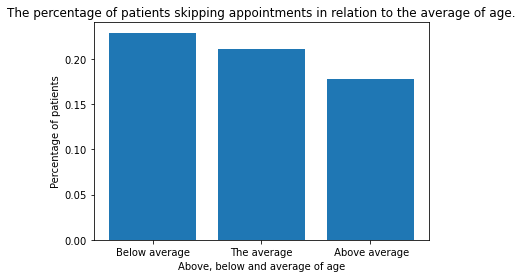

In [96]:
plt.bar(["Below average", "The average" ," Above average"], [prop_age_below_skip, prop_age_skip, prop_age_above_skip])
plt.title("The percentage of patients skipping appointments in relation to the average of age.")
plt.xlabel("Above, below and average of age")
plt.ylabel("Percentage of patients");

### 4. Analysis of the relation between scholarship and whether or not patients no-show an appoinment

In [97]:
#Calculate the number of patients with or without scholarship. 
#Calaculate the percentage patients who show or didn't show up for their scheduled appointment. 
#Visualize the finding.

In [98]:
df["scholarship"].count()

110527

In [99]:
no_sch = df.query("scholarship == 0")
no_sch["scholarship"].count()

99666

In [100]:
sch = df.query("scholarship == 1")
sch["scholarship"].count()

10861

In [101]:
prop_no_sch = 99666 / 110527
prop_sch = 10861 / 110527
(prop_no_sch, prop_sch)

(0.9017344178345562, 0.09826558216544373)

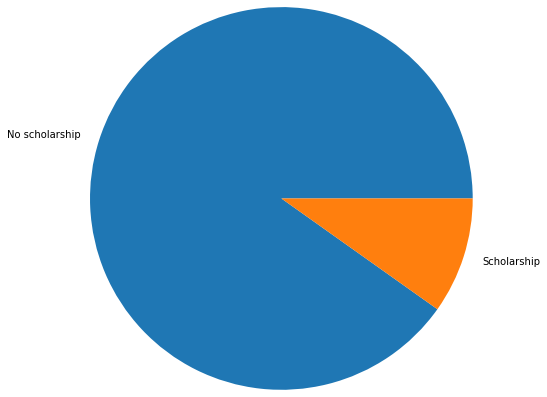

In [102]:
plt.pie([prop_no_sch, prop_sch], labels = (["No scholarship", "Scholarship"]), radius = 2.2);

##### More than 90% of patient don't have a scholarship

In [103]:
no_sch_skip = no_sch.groupby("no_show").count()
no_sch_skip

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,days_btn_sch_app
no_show,,,,,,,,,,,
No,79925,79925,79925,79925,79925,79925,79925,79925,79925,79925,79925
Yes,19741,19741,19741,19741,19741,19741,19741,19741,19741,19741,19741


In [104]:
prop_no_show = 79925 / 99666
prop_no_skip = 19741 / 99666
(prop_no_show, prop_no_skip)

(0.8019284409929164, 0.19807155900708365)

In [105]:
sch_skip = sch.groupby("no_show").count()
sch_skip

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,days_btn_sch_app
no_show,,,,,,,,,,,
No,8283,8283,8283,8283,8283,8283,8283,8283,8283,8283,8283
Yes,2578,2578,2578,2578,2578,2578,2578,2578,2578,2578,2578


In [106]:
prop_sch_show = 8283 / 10861
prop_sch_skip = 2578 / 10861
(prop_sch_show, prop_sch_skip)

(0.7626369579228433, 0.2373630420771568)

### The percentage of patients who didn't show up for their appointment is higher in patients with scholarship

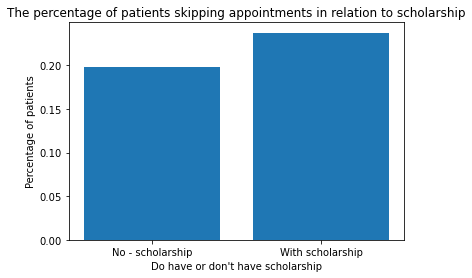

In [107]:
plt.bar(["No - scholarship", "With scholarship"], [prop_no_skip, prop_sch_skip])
plt.title("The percentage of patients skipping appointments in relation to scholarship")
plt.xlabel("Do have or don't have scholarship")
plt.ylabel("Percentage of patients");

### 5. Analysis of the relation between hipertension and whether or not patients no-show an appoinment

In [108]:
#Calculate the number of patients with or without hipertension. 
#Calaculate the percentage patients who show or didn't show up for their scheduled appointment.
#Visualize the finding.

In [109]:
df["hipertension"].count()

110527

In [110]:
no_hip = df.query("hipertension == 0")
no_hip["hipertension"].count()

88726

In [111]:
hip = df.query("hipertension == 1")
hip["hipertension"].count()

21801

In [112]:
prop_no_hip = 88726 / 110527
prop_hip = 21801 / 110527
(prop_no_hip, prop_hip)

(0.8027540781890398, 0.1972459218109602)

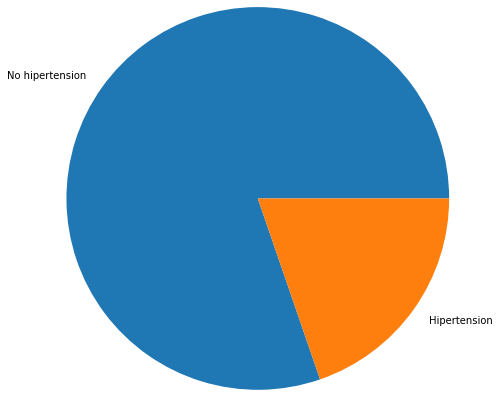

In [113]:
plt.pie([prop_no_hip, prop_hip], labels = (["No hipertension", "Hipertension"]), radius = 2.2);

##### More than 80% of patients didn't have hipertension.

In [114]:
no_hip_skip = no_hip.groupby("no_show").count()
no_hip_skip

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,days_btn_sch_app
no_show,,,,,,,,,,,
No,70179,70179,70179,70179,70179,70179,70179,70179,70179,70179,70179
Yes,18547,18547,18547,18547,18547,18547,18547,18547,18547,18547,18547


In [115]:
prop_no_hip_show = 70179 / 88726
prop_no_hip_skip = 18547 / 88726
(prop_no_hip_show, prop_no_hip_skip)

(0.7909631900457589, 0.20903680995424115)

In [116]:
hip_skip = hip.groupby("no_show").count()
hip_skip

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,days_btn_sch_app
no_show,,,,,,,,,,,
No,18029,18029,18029,18029,18029,18029,18029,18029,18029,18029,18029
Yes,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772,3772


In [117]:
prop_hip_show = 18029 / 21801
prop_hip_skip = 3772 / 21801
(prop_hip_show, prop_hip_skip)

(0.8269804137424889, 0.17301958625751113)

### The percentage of patients who didn't show up for their appointment is higher in patients without hipertension

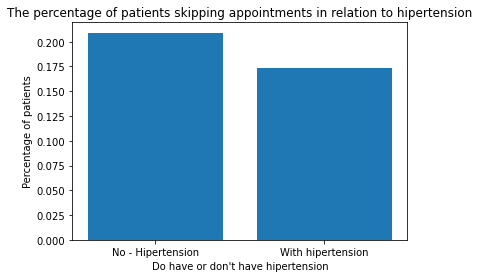

In [118]:
plt.bar(["No - Hipertension", "With hipertension"], [prop_no_hip_skip, prop_hip_skip])
plt.title("The percentage of patients skipping appointments in relation to hipertension")
plt.xlabel("Do have or don't have hipertension")
plt.ylabel("Percentage of patients");

### 6. Analysis of the relation between alcoholism and whether or not patients no-show an appoinment

In [119]:
#Calculate the number of patients with or without alcoholism. 
#Calaculate the percentage patients who show or didn't show up for their scheduled appointment. 
#Visualize the finding.

In [120]:
df["alcoholism"].count()

110527

In [121]:
no_alc = df.query("alcoholism == 0")
no_alc["alcoholism"].count()

107167

In [122]:
alc = df.query("alcoholism == 1")
alc["alcoholism"].count()

3360

In [123]:
prop_no_alc = 107167 / 110527
prop_alc = 3360 / 110527
(prop_no_alc, prop_alc)

(0.9696001881893113, 0.030399811810688793)

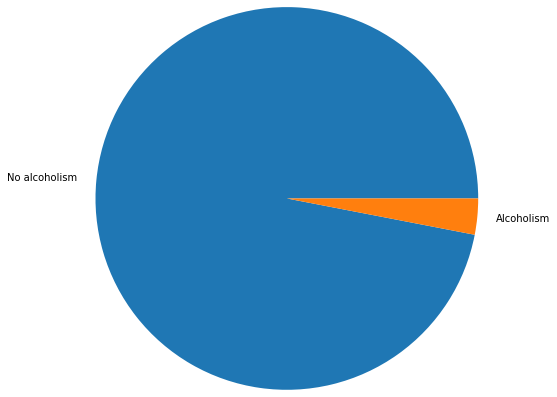

In [124]:
plt.pie([prop_no_alc, prop_alc], labels = (["No alcoholism", "Alcoholism"]), radius = 2.2);

##### More than 96% of patients are without alcoholism

In [125]:
no_alc_skip = no_alc.groupby("no_show").count()
no_alc_skip

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,days_btn_sch_app
no_show,,,,,,,,,,,
No,85525,85525,85525,85525,85525,85525,85525,85525,85525,85525,85525
Yes,21642,21642,21642,21642,21642,21642,21642,21642,21642,21642,21642


In [126]:
prop_no_alc_show = 85525 / 107167
prop_no_alc_skip = 21642 / 107167
(prop_no_alc_show, prop_no_alc_skip)

(0.798053505276811, 0.20194649472318904)

In [127]:
alc_skip = alc.groupby("no_show").count()
alc_skip

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,days_btn_sch_app
no_show,,,,,,,,,,,
No,2683,2683,2683,2683,2683,2683,2683,2683,2683,2683,2683
Yes,677,677,677,677,677,677,677,677,677,677,677


In [128]:
prop_alc_show = 2683 / 3360
prop_alc_skip = 677 / 3360
(prop_alc_show, prop_alc_skip)

(0.7985119047619048, 0.20148809523809524)

### Alcoholism doesn't appear to be a factor in whether a patient show up or not

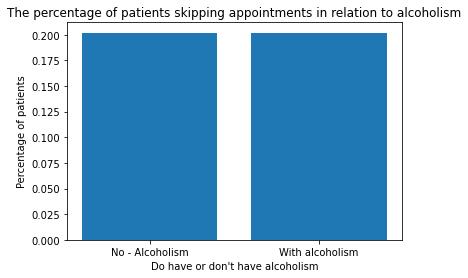

In [129]:
plt.bar(["No - Alcoholism", "With alcoholism"], [prop_no_alc_skip, prop_alc_skip])
plt.title("The percentage of patients skipping appointments in relation to alcoholism")
plt.xlabel("Do have or don't have alcoholism")
plt.ylabel("Percentage of patients");

### 7.Analysis of the relation between handcap and whether or not patients no-show an appoinment

In [130]:
#Calculate the number of patients with or without handcap.
#Calaculate the percentage patients who show or didn't show up for their scheduled appointment. 
#Visualize the finding.

In [131]:
df["handcap"].count()

110527

In [132]:
df["handcap"].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [133]:
no_han = df.query("handcap == 0")
no_han["handcap"].count()

108286

In [134]:
han = df.query("handcap != 0")
han["handcap"].count()

2241

In [135]:
prop_no_han = 108286 / 110527
prop_han = 2241 / 110527
(prop_no_han, prop_han)

(0.9797244112298352, 0.020275588770164756)

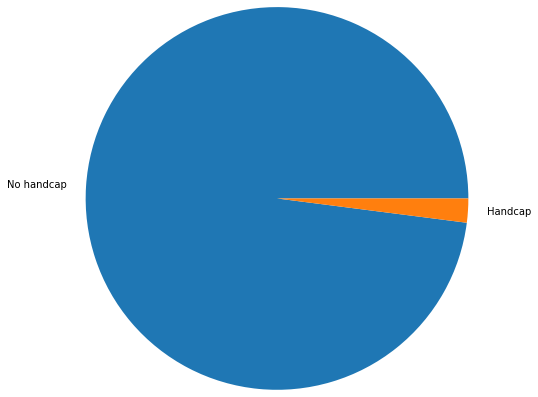

In [136]:
plt.pie([prop_no_han, prop_han], labels = (["No handcap", "Handcap"]), radius = 2.2);

##### More than 97% of patient are not handcap

In [137]:
no_han_skip = no_han.groupby("no_show").count()
no_han_skip

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,days_btn_sch_app
no_show,,,,,,,,,,,
No,86374,86374,86374,86374,86374,86374,86374,86374,86374,86374,86374
Yes,21912,21912,21912,21912,21912,21912,21912,21912,21912,21912,21912


In [138]:
prop_no_han_show = 86374 / 108286
prop_no_han_skip = 21912 / 108286
(prop_no_han_show, prop_no_han_skip)

(0.7976469719077258, 0.20235302809227415)

In [139]:
han_skip = han.groupby("no_show").count()
han_skip

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,days_btn_sch_app
no_show,,,,,,,,,,,
No,1834,1834,1834,1834,1834,1834,1834,1834,1834,1834,1834
Yes,407,407,407,407,407,407,407,407,407,407,407


In [140]:
prop_han_show = 1834 / 2241
prop_han_skip = 407 / 2241
(prop_han_show, prop_han_skip)

(0.818384649709951, 0.18161535029004908)

### The percentage of patients who didn't show up for their appointment is higher in patients who are not hancap

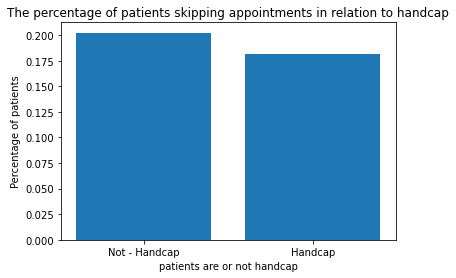

In [141]:
plt.bar(["Not - Handcap", "Handcap"], [prop_no_han_skip, prop_han_skip])
plt.title("The percentage of patients skipping appointments in relation to handcap")
plt.xlabel("patients are or not handcap")
plt.ylabel("Percentage of patients");

### 8.Analysis of the relation between patients recieved SMS and whether or not patients no-show an appoinment

In [142]:
#Calculate the number of patients who recieved or didn't recieve SMS.
#Calaculate the percentage patients who show or didn't show up for their scheduled appointment. 
#Visualize the finding.

In [143]:
df["sms_received"].count()

110527

In [144]:
no_sms = df.query("sms_received == 0")
no_sms["handcap"].count()

75045

In [145]:
sms = df.query("sms_received == 1")
sms["sms_received"].count()

35482

In [146]:
prop_no_sms = 75045 / 110527
prop_sms = 35482 / 110527
(prop_no_sms, prop_sms)

(0.6789743682539108, 0.32102563174608917)

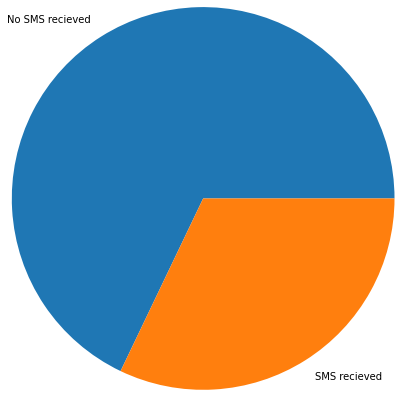

In [147]:
plt.pie([prop_no_sms, prop_sms], labels = (["No SMS recieved", "SMS recieved"]), radius = 2.2);

##### More than 67% of patients didn't receive a SMS.

In [148]:
no_sms_skip = no_sms.groupby("no_show").count()
no_sms_skip

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,days_btn_sch_app
no_show,,,,,,,,,,,
No,62510,62510,62510,62510,62510,62510,62510,62510,62510,62510,62510
Yes,12535,12535,12535,12535,12535,12535,12535,12535,12535,12535,12535


In [149]:
prop_no_sms_show = 62510 / 75045
prop_no_sms_skip = 12535 / 75045
(prop_no_sms_show, prop_no_sms_skip)

(0.8329668865347458, 0.16703311346525418)

In [150]:
sms_skip = sms.groupby("no_show").count()
sms_skip

,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,days_btn_sch_app
no_show,,,,,,,,,,,
No,25698,25698,25698,25698,25698,25698,25698,25698,25698,25698,25698
Yes,9784,9784,9784,9784,9784,9784,9784,9784,9784,9784,9784


In [151]:
prop_sms_show = 25698 / 35482
prop_sms_skip = 9784 / 35482
(prop_sms_show, prop_sms_skip)

(0.7242545516036301, 0.27574544839637)

### The percentage of patients who didn't show up for their appointment is higher in patients recieved SMS

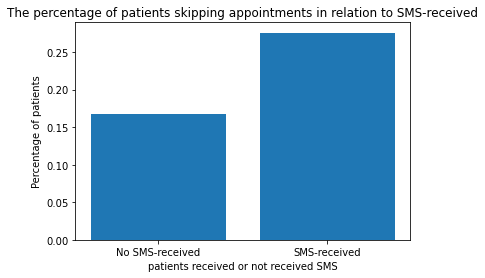

In [152]:
plt.bar(["No SMS-received", "SMS-received"], [prop_no_sms_skip, prop_sms_skip])
plt.title("The percentage of patients skipping appointments in relation to SMS-received")
plt.xlabel("patients received or not received SMS")
plt.ylabel("Percentage of patients");

# Conclusions

The answer to the question
### Which factors if any are important in order to predict if a patient will show up for their scheduled appointment?

##### 1. With regard to the gender the percentage of male and female who didn't show up for their appointment is the same 20%.
Keep in mind that 64.9% of the patients are female. 

##### 2. With regard to number of days between scheduling an appointment and the day of the appointment when the number of above average the percentage of patients no-show appointment is 32.5% in comparision to the 14.6% when the number of days is below average.
keep in mind that the number of days for 68.8% of patients is below average.

##### 3. With regard to age the percentage of patients no- show an appointment increases as patients gets younger when below average it was 22.9%, the average 17.8 and above average 21.1%

##### 4. Patients with scholarship tend to no-show appointment 23.7% in comparision to 19.8% of patients with no scholarship 
Keep in mind that the percentage of patients with scholarship is less than 10% of the patients 

##### 5. Patients without hipertension tend to no-show appointment 20.9% in comparision to the 17.3% of patients with hipertension.
Keep in mind that only 19.7% of patients have hippertension

##### 6. With regard to the alcoholism the percentage of patients who didn't show up for their appointment  is the same 20.1%.
Keep in mind that only 3% of the patients are alcoholic which limit our conclusions severaly. 

##### 7. Patients without handcap tend to no-show appointment 20.2% in comparision to the 18.1% of patients with handcap.
Keep in mind that only 2% of the patients are handcap which limit our conclusions severaly. 

##### 8. Patients who did receive SMS tend to no-show appointment 27.5% in comparision to the 16.7% of patients who didn't receive SMS.
Keep in mind that only 32.1% of patients recieved SMS